<a href="https://colab.research.google.com/github/Mihirgupta2001/Mihirgupta2001/blob/main/EDA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data Sets/Hotel Bookings.csv'
df = df=pd.read_csv(path)

In [ ]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# We can see that there are null values in countries, agent, children and company column
Put '0' for children

Put 'NaN' for agent

Put 'NaN' for Company

Put 'others' for Country

In [ ]:
df['children'].fillna(0,inplace = True)
df['agent'].fillna('NaN',inplace = True)
df['company'].fillna('NaN',inplace = True)
df['country'].fillna('others',inplace = True)

In [ ]:
#childrens cannot be in float, changing it to int
df['children'] = df['children'].astype(int)

In [ ]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. Which hotels are having more cancellations, City or Resort? What is the percentage of people cancelling there booking?

In [ ]:
#Counting the total number of canceled hotel bookings
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#Counting the total numbers of Resort and City hotels were booked
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# Seperating the relevant dataframe from the actual data and from there filtering out the canceled hotel bookings in Resort and City category hotels
relevant_df = df[['hotel','is_canceled','arrival_date_month','arrival_date_year']].copy()
relevant_df1 = relevant_df[(relevant_df['hotel'] == 'Resort Hotel') & (relevant_df['is_canceled'] == 1)]
relevant_df2 = relevant_df[(relevant_df['hotel'] == 'City Hotel') & (relevant_df['is_canceled'] == 1)]

In [ ]:
# Grouping the data by Month and year and counting the total number of cancellations in each category
resort_cancel_data = relevant_df1.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()
city_cancel_data = relevant_df2.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()


In [ ]:
# Splitting the data frame for cancelled bookings in resort accorindig to year 2015,2016,2017
resort_cancel_data_2015 = resort_cancel_data[resort_cancel_data['arrival_date_year']==2015]
resort_cancel_data_2016 = resort_cancel_data[resort_cancel_data['arrival_date_year']==2016]
resort_cancel_data_2017 = resort_cancel_data[resort_cancel_data['arrival_date_year']==2017]

# Splitting the data frame for cancelled bookings in City accorindig to year 2015,2016,2017
city_cancel_data_2015 = city_cancel_data[city_cancel_data['arrival_date_year']==2015]
city_cancel_data_2016 = city_cancel_data[city_cancel_data['arrival_date_year']==2016]
city_cancel_data_2017 = city_cancel_data[city_cancel_data['arrival_date_year']==2017]


In [ ]:
# Getting the total number of booking in a particual month of a particular year
#filtering out the successful hotel bookings in Resort and City category hotels
relevant_df3 = relevant_df[(relevant_df['hotel'] == 'Resort Hotel') & (relevant_df['is_canceled'] == 0)]
relevant_df4 = relevant_df[(relevant_df['hotel'] == 'City Hotel') & (relevant_df['is_canceled'] == 0)]

# Grouping the data by Month and year and counting the total number of succesful hotel bookings in each category
resort_success_data = relevant_df3.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()
city_success_data = relevant_df4.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()

# Splitting the data frame for succesful accorindig to year 2015,2016,2017 for resort
resort_success_data_2015 = resort_success_data[resort_success_data['arrival_date_year']==2015].rename(columns = {'is_canceled':'is_not_canceled'})
resort_success_data_2016 = resort_success_data[resort_success_data['arrival_date_year']==2016].rename(columns = {'is_canceled':'is_not_canceled'})
resort_success_data_2017 = resort_success_data[resort_success_data['arrival_date_year']==2017].rename(columns = {'is_canceled':'is_not_canceled'})

# Splitting the data frame for successful bookings according to year 2015,2016,2017 for City
city_success_data_2015 = city_success_data[city_success_data['arrival_date_year']==2015].rename(columns = {'is_canceled':'is_not_canceled'})
city_success_data_2016 = city_success_data[city_success_data['arrival_date_year']==2016].rename(columns = {'is_canceled':'is_not_canceled'})
city_success_data_2017 = city_success_data[city_success_data['arrival_date_year']==2017].rename(columns = {'is_canceled':'is_not_canceled'})



In [ ]:
# Merging to final data set for resort
resort_final_data_2015 = pd.merge(resort_cancel_data_2015,resort_success_data_2015,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
resort_final_data_2015.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
resort_final_data_2015 = resort_final_data_2015.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
resort_final_data_2015 = resort_final_data_2015.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_resort_2015 = resort_final_data_2015.Percentage_of_cancellation.mean()


resort_final_data_2016 = pd.merge(resort_cancel_data_2016,resort_success_data_2016,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
resort_final_data_2016.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
resort_final_data_2016 = resort_final_data_2016.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
resort_final_data_2016 = resort_final_data_2016.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_resort_2016 = resort_final_data_2016.Percentage_of_cancellation.mean()


resort_final_data_2017 = pd.merge(resort_cancel_data_2017,resort_success_data_2017,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
resort_final_data_2017.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
resort_final_data_2017 = resort_final_data_2017.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
resort_final_data_2017 = resort_final_data_2017.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_resort_2017 = resort_final_data_2017.Percentage_of_cancellation.mean()




In [ ]:
# Merging to final data set for city
city_final_data_2015 = pd.merge(city_cancel_data_2015,city_success_data_2015,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
city_final_data_2015.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
city_final_data_2015 = city_final_data_2015.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
city_final_data_2015 = city_final_data_2015.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_city_2015 = city_final_data_2015.Percentage_of_cancellation.mean()


city_final_data_2016 = pd.merge(city_cancel_data_2016,city_success_data_2016,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
city_final_data_2016.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
city_final_data_2016 = city_final_data_2016.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
city_final_data_2016 = city_final_data_2016.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_city_2016 = city_final_data_2016.Percentage_of_cancellation.mean()


city_final_data_2017 = pd.merge(resort_cancel_data_2017,resort_success_data_2017,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
city_final_data_2017.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
city_final_data_2017 = resort_final_data_2017.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
city_final_data_2017 = city_final_data_2017.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_city_2017 = city_final_data_2017.Percentage_of_cancellation.mean()



In [ ]:
# Defining the mean percentage of cancellation every year as array
percent_array = np.array([[percent_mean_city_2015,percent_mean_city_2016,percent_mean_city_2017],[percent_mean_resort_2015,percent_mean_resort_2016,percent_mean_resort_2017]])


In [ ]:
# Converting the array to dataframe which would be used to plot
plotting_df = pd.DataFrame(percent_array, columns = ['2015','2016','2017'])
plotting_df


,2015,2016,2017
0,44.056872,39.79301,30.144915
1,25.159454,25.97572,30.144915


[Text(0, 0, 'City Hotel'), Text(0, 0, 'Resort Hotel')]

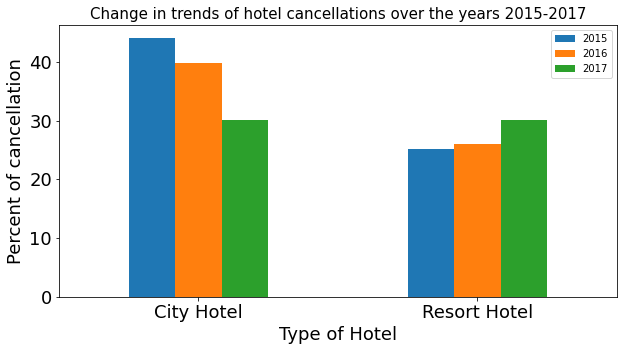

In [ ]:
# Plotting the Graph
plotting = plotting_df.plot.bar(figsize = (10,5),fontsize = 18)
plotting.set_title('Change in trends of hotel cancellations over the years 2015-2017', fontsize = 15)
plotting.set_xlabel('Type of Hotel', fontsize = 18)
plotting.set_ylabel('Percent of cancellation', fontsize = 18)
plotting.set_xticklabels(['City Hotel','Resort Hotel'],rotation=0) 
